In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
kle = pd.read_csv('data/Life Expectancy Data.csv')

In [3]:
kle

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
kle_data = kle.groupby('Country').mean()

In [5]:
kle_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [6]:
kle_data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
kle.Year = pd.to_datetime(kle.Year, format = '%Y')
kle.Year

0      2015-01-01
1      2014-01-01
2      2013-01-01
3      2012-01-01
4      2011-01-01
          ...    
2933   2004-01-01
2934   2003-01-01
2935   2002-01-01
2936   2001-01-01
2937   2000-01-01
Name: Year, Length: 2938, dtype: datetime64[ns]

In [8]:
countries = kle.Country.unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [9]:
kle_data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
kle.Status.value_counts(normalize=True)

Developing    0.825732
Developed     0.174268
Name: Status, dtype: float64

In [11]:
country = 'United States of America'

usa = kle[kle['Country'].values == country]
usa

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2794,United States of America,2015-01-01,Developed,79.3,13.0,23,NaN,0.0,92.0,188,...,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2795,United States of America,2014-01-01,Developed,79.1,14.0,23,8.82,0.0,92.0,667,...,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2796,United States of America,2013-01-01,Developed,78.9,16.0,23,8.82,0.0,91.0,187,...,93.0,16.90,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2797,United States of America,2012-01-01,Developed,78.8,16.0,24,8.82,0.0,9.0,55,...,93.0,17.20,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2798,United States of America,2011-01-01,Developed,78.7,16.0,25,8.67,0.0,91.0,220,...,94.0,17.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2799,United States of America,2010-01-01,Developed,78.7,15.0,25,8.55,0.0,92.0,63,...,93.0,17.20,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2800,United States of America,2009-01-01,Developed,78.5,18.0,26,8.71,0.0,92.0,71,...,93.0,17.00,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2801,United States of America,2008-01-01,Developed,78.2,18.0,27,8.74,0.0,94.0,140,...,94.0,16.20,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2802,United States of America,2007-01-01,Developed,78.1,11.0,27,8.74,0.0,93.0,43,...,93.0,15.57,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2803,United States of America,2006-01-01,Developed,77.8,113.0,28,8.63,0.0,93.0,55,...,93.0,15.27,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

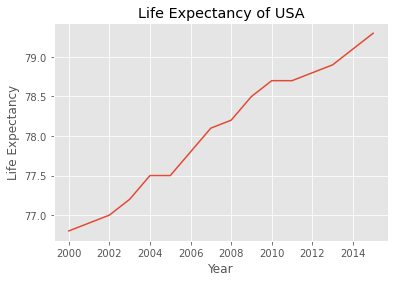

In [12]:
plt.plot(usa.Year, usa['Life expectancy '])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy of USA')
plt.show

In [13]:
country_df = kle.groupby('Country')
country_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015-01-01,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014-01-01,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013-01-01,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012-01-01,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8


In [14]:
kle.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

Text(0.5, 1.0, 'Life Expectancy Differences between Developing (82.6%) v. Developed (17.4%) Countries')

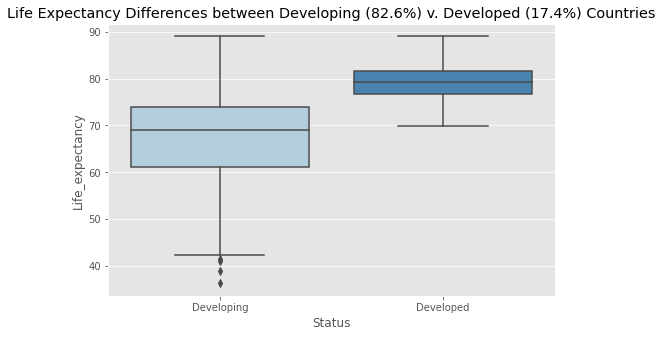

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x='Status', y='Life_expectancy', data=kle, palette='Blues')
plt.title('Life Expectancy Differences between Developing (82.6%) v. Developed (17.4%) Countries')

In [16]:
top_5 = kle.sort_values(by=['Life expectancy '], ascending=False).head(5)
top_5


KeyError: 'Life expectancy '

In [17]:
top_5_all = kle.loc[kle.Country.isin(['Spain', 'Norway', 'France', 'Finland', 'Sweden'])]
top_5_all

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
914,Finland,2015-01-01,Developing,81.1,76.0,0,NaN,0.000000,NaN,2,...,97.0,NaN,97.0,0.1,4245.39744,5479531.0,0.9,0.8,0.893,17.0
915,Finland,2014-01-01,Developing,89.0,78.0,0,8.80,6164.455402,NaN,0,...,98.0,9.68,98.0,0.1,49914.61864,5461512.0,0.9,0.8,0.890,17.0
916,Finland,2013-01-01,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.77130,5438972.0,0.9,0.8,0.887,17.0
917,Finland,2012-01-01,Developing,84.0,82.0,0,9.24,5889.012536,NaN,0,...,99.0,9.30,99.0,0.1,47415.55987,5413971.0,0.9,0.8,0.884,17.0
918,Finland,2011-01-01,Developing,83.0,86.0,0,9.81,71.016208,NaN,27,...,99.0,9.10,99.0,0.1,579.72415,5388272.0,0.9,0.8,0.878,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,Sweden,2004-01-01,Developed,83.0,7.0,0,6.60,5793.363644,NaN,5,...,99.0,9.90,99.0,0.1,42442.22450,8993531.0,1.3,1.3,0.888,16.0
2517,Sweden,2003-01-01,Developed,82.0,69.0,0,6.90,5067.411418,NaN,3,...,99.0,9.31,99.0,0.1,36961.42537,8958229.0,1.3,1.3,0.882,15.9
2518,Sweden,2002-01-01,Developed,79.9,71.0,0,6.90,3998.099870,NaN,9,...,99.0,9.23,99.0,0.1,29571.74460,8924958.0,1.3,1.3,0.880,15.9
2519,Sweden,2001-01-01,Developed,79.8,73.0,0,6.60,3554.546434,NaN,5,...,99.0,8.86,99.0,0.1,26969.24457,889596.0,1.3,1.3,0.877,15.9


ValueError: Could not interpret value `Life expectancy ` for parameter `y`

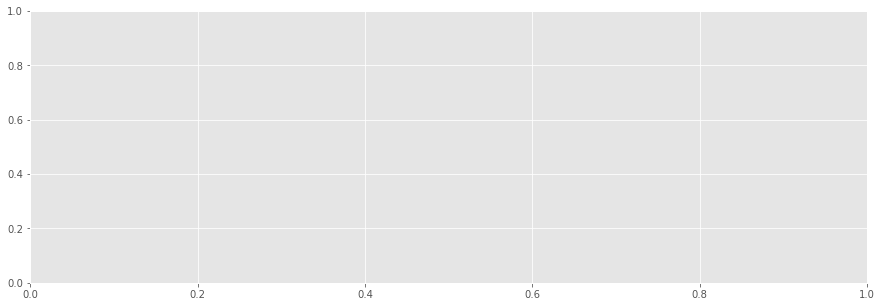

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x='Year', y='Life expectancy ', data=top_5_all, hue='Country', palette='Accent')
sns.lineplot(x='Year', y='Life expectancy ', data=usa, hue='Country', color='k')

<AxesSubplot:>

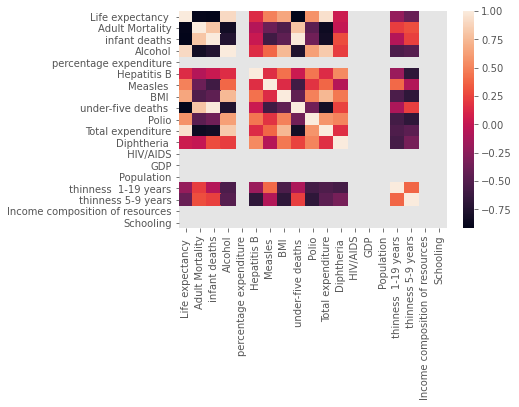

In [19]:
corr = usa.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Life Expectancies in Developed and Developing Countries, 2000 to 2015')

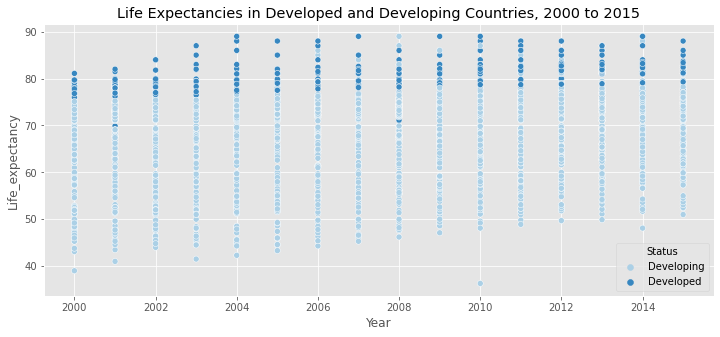

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x='Year', y='Life_expectancy', data=kle, hue='Status', palette='Blues', ax=ax)
plt.title('Life Expectancies in Developed and Developing Countries, 2000 to 2015')

In [24]:
kle.head()

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
status = pd.get_dummies(kle.Status)

In [26]:
kle = pd.concat([kle, status], axis = 1)

In [27]:
kle = kle.drop(['Status'], axis=1)

In [28]:
kle.drop(['Developing'], axis=1, inplace=True)

In [29]:
kle.columns

Index(['Country', 'Year', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Developed'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

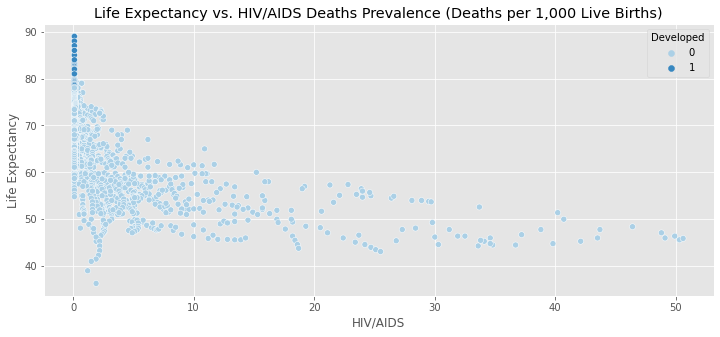

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('HIV/AIDS', 'Life_expectancy', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. HIV/AIDS Deaths Prevalence (Deaths per 1,000 Live Births)')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

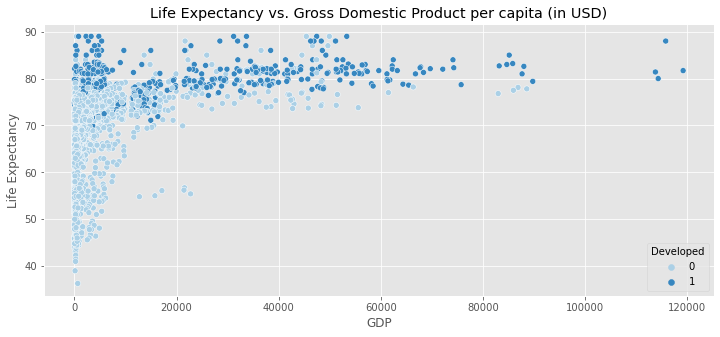

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('GDP', 'Life_expectancy', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Gross Domestic Product per capita (in USD)')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

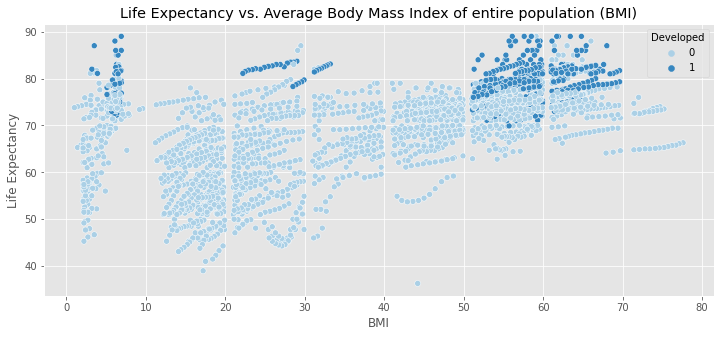

In [90]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('BMI', 'Life_expectancy', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Average Body Mass Index of entire population (BMI)')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

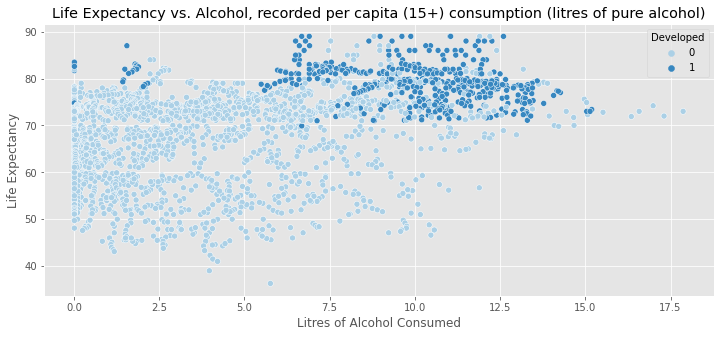

In [91]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Alcohol', 'Life_expectancy', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Alcohol, recorded per capita (15+) consumption (litres of pure alcohol)')
plt.xlabel('Litres of Alcohol Consumed')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

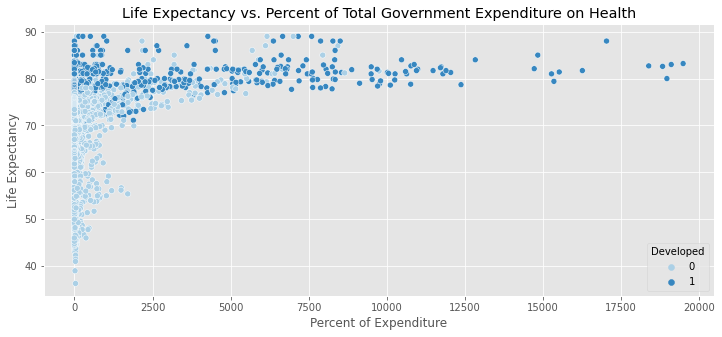

In [93]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Percentage_expenditure', 'Life_expectancy', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Percent of Total Government Expenditure on Health')
plt.xlabel('Percent of Expenditure')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

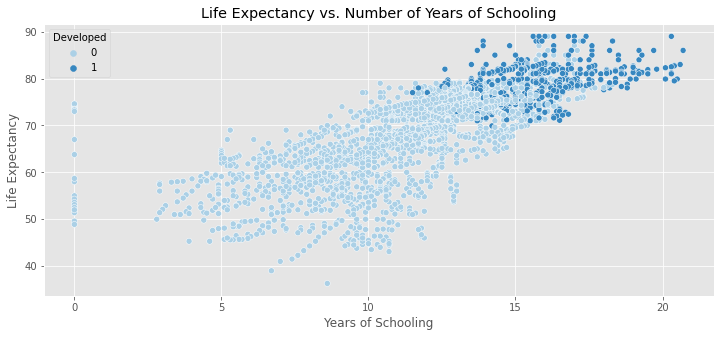

In [94]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Schooling', 'Life_expectancy', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Number of Years of Schooling')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')

<AxesSubplot:>

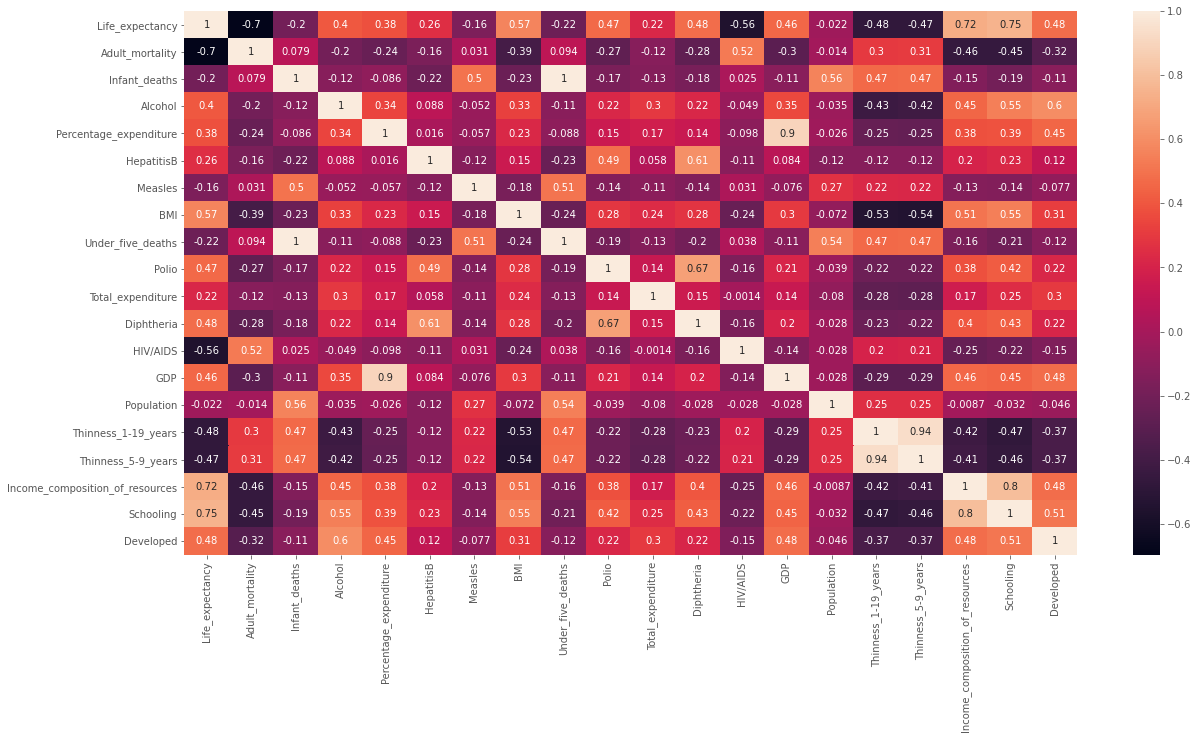

In [99]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(kle.corr(), annot=True, ax=ax)

In [142]:
kle_labels = kle_data['Life_expectancy']

In [250]:
kle_features = kle_data.drop('Life_expectancy', axis=1)

In [251]:
kle_features.isnull().head()

,Year,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [145]:
kle_features.isnull().sum()

Year                                0
Adult_mortality                    10
Infant_deaths                       0
Alcohol                             2
Percentage_expenditure              0
HepatitisB                          9
Measles                             0
BMI                                 4
Under_five_deaths                   0
Polio                               0
Total_expenditure                   2
Diphtheria                          0
HIV/AIDS                            0
GDP                                30
Population                         48
Thinness_1-19_years                 4
Thinness_5-9_years                  4
Income_composition_of_resources    17
Schooling                          13
dtype: int64

In [146]:
kle_labels.isnull().sum()

10

In [147]:
kle_features.fillna(value=kle_features.mean(), inplace=True)

In [148]:
kle_labels.fillna(value = kle_labels.mean(), inplace=True)

In [149]:
stats.describe(kle_features[1:])

DescribeResult(nobs=192, minmax=(array([2.00750000e+03, 1.87500000e+01, 0.00000000e+00, 1.00000000e-02,
       0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 5.20000000e+00,
       0.00000000e+00, 9.00000000e+00, 1.64666667e+00, 9.00000000e+00,
       1.00000000e-01, 1.36183210e+02, 2.92000000e+02, 1.00000000e-01,
       1.00000000e-01, 1.31687500e-01, 0.00000000e+00]), array([2.01300000e+03, 5.50062500e+02, 1.36668750e+03, 1.34973333e+01,
       9.80181038e+03, 9.90000000e+01, 6.58579375e+04, 8.73000000e+01,
       1.81250000e+03, 9.90000000e+01, 1.72400000e+01, 9.90000000e+01,
       3.29437500e+01, 5.73628746e+04, 4.21467691e+08, 2.71000000e+01,
       2.79437500e+01, 9.31437500e-01, 2.00375000e+01])), mean=array([2.00778646e+03, 1.64253396e+02, 2.85745443e+01, 4.46296480e+00,
       7.12321318e+02, 7.85909681e+01, 2.30174674e+03, 3.96797168e+01,
       3.96419271e+01, 8.26078218e+01, 6.01668050e+00, 8.23842541e+01,
       1.67047526e+00, 7.25930328e+03, 1.25835883e+07, 4.62089964e

In [152]:
min_max_scaler = MinMaxScaler()

In [239]:
kle_features_scaled = min_max_scaler.fit_transform(kle_features)

In [240]:
kle_features_scaled

array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        5.56004489e-01, 3.54720225e-01, 4.09856519e-01],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        5.74635241e-02, 7.22960300e-01, 6.05739239e-01],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        2.10998878e-01, 7.04204439e-01, 6.34435434e-01],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.90235690e-01, 4.29899969e-01, 4.24516532e-01],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        2.39281706e-01, 4.58580807e-01, 5.59575795e-01],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        2.47362514e-01, 3.84417005e-01, 4.90330630e-01]])

In [241]:
kle_features_train, kle_features_test, kle_labels_train, kle_labels_test = train_test_split(kle_features_scaled, kle_labels, train_size=0.8, test_size=0.2)

In [242]:
linear_model = LinearRegression()

In [243]:
linear_model.fit(kle_features_train, kle_labels_train)

LinearRegression()

In [244]:
print('R_square score on the training set: %.2f' % linear_model.score(kle_features_train, kle_labels_train))

R_square score on the training set: 0.94


In [245]:
linear_model_predict = linear_model.predict(kle_features_test)

In [246]:
print('Coefficients: \n', linear_model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(kle_labels_test, linear_model_predict))

Coefficients: 
 [  -2.42340951  -26.47439465  122.91841024    1.00399027    1.71595496
   -0.94092174   -0.55587717    4.55782633 -135.86678542   -1.36176615
    2.87045599    7.94329697   -4.78927381    1.95378719   10.64081762
   -2.65691728    3.68943096    6.22067365    3.29196318]
Mean squared error: 8.72
Mean absolute error: 2.36
R_square score: 0.87


In [247]:
scoring = make_scorer(r2_score)

In [248]:
scoring

make_scorer(r2_score)

In [249]:
grid_cv = GridSearchCV(Ridge(), param_grid={'alpha': range(0, 10), 'max_iter': [10, 1000, 1000]}, scoring=scoring, cv=5)

In [177]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best Params: ' + str(grid_cv.best_params_))
print('Best Estimator: ' + str(grid_cv.best_estimator_))
print('Best Score: ' + str(grid_cv.best_score_))


Best Params: {'alpha': 0, 'max_iter': 10}
Best Estimator: Ridge(alpha=0, max_iter=10)
Best Score: 0.8917015483323418


In [178]:
result = grid_cv.cv_results_
result

{'mean_fit_time': array([0.00174575, 0.00131989, 0.00136456, 0.00080652, 0.00120139,
        0.00169716, 0.00142398, 0.0014966 , 0.00133729, 0.00148888,
        0.00093489, 0.00087366, 0.0008059 , 0.00077691, 0.00086393,
        0.00071616, 0.00079784, 0.00061579, 0.00086417, 0.00067687,
        0.00062857, 0.00072122, 0.00060101, 0.00062804, 0.00059133,
        0.00061302, 0.00061197, 0.00065002, 0.00059638, 0.00081286]),
 'std_fit_time': array([2.72287980e-04, 3.61028210e-04, 4.57836001e-04, 1.11637590e-04,
        8.84202384e-04, 3.22186931e-04, 2.71719687e-04, 2.77753261e-04,
        2.61895533e-04, 3.91105238e-04, 2.68449597e-04, 3.10855757e-04,
        1.79003831e-04, 1.55105138e-04, 2.05351936e-04, 8.14488117e-05,
        1.86156738e-04, 4.34797054e-05, 2.60953839e-04, 8.24742214e-05,
        4.68507007e-05, 1.70051590e-04, 2.21631326e-05, 3.84622894e-05,
        8.70329054e-06, 3.46311173e-05, 3.49080626e-05, 7.74017903e-05,
        2.29603900e-05, 2.77815477e-04]),
 'mean_scor

In [179]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.93
R_square score: 0.89
Mean squared error: 9.23
mean absolute error: 2.11


In [180]:
scoring = make_scorer(r2_score)

In [187]:
grid_cv = GridSearchCV(Lasso(), param_grid={'alpha': range(1, 100), 'max_iter': [10, 100, 1000, 10000]}, scoring=scoring, cv=5)

In [188]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': range(1, 100),
                         'max_iter': [10, 100, 1000, 10000]},
             scoring=make_scorer(r2_score))

In [189]:
print('Best parameters: ' + str(grid_cv.best_params_))

Best parameters: {'alpha': 1, 'max_iter': 10}


In [190]:
result = grid_cv.cv_results_

In [191]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.45
R_square score: 0.42
Mean squared error: 9.23
Mean absolute error: 2.11


In [199]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(), param_grid = {'alpha': range(1, 10), 'max_iter': [10, 100, 1000], 'l1_ratio': [0.1, 0.4, 0.8]}, scoring=scoring, cv=5)

In [200]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best parameters: ' + str(grid_cv.best_params_))


Best parameters: {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 10}


In [201]:
result = grid_cv.cv_results_

In [202]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.24
R_square score: 0.24
Mean squared error: 9.23
Mean absolute error: 2.11


### Decision Tree Regressor 

In [203]:
dt_model = DecisionTreeRegressor()

In [204]:
dt_fit = dt_model.fit(kle_features_train, kle_labels_train)

In [205]:
dt_score = cross_val_score(dt_fit, kle_features_train, kle_labels_train, cv=5)

In [206]:
print('Mean Cross Val Score: %.2f' % np.mean(dt_score))
print('Score without CV: %.2f' % dt_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, dt_fit.predict(kle_features_test)))

Mean Cross Val Score: 0.80
Score without CV: 1.00
R_square score on the test data: 0.88


In [207]:
dt_model_predict = dt_model.predict(kle_features_test)

In [208]:
scoring = make_scorer(r2_score)

In [209]:
grid_cv = GridSearchCV(DecisionTreeRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [210]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [211]:
grid_cv.best_params_

{'min_samples_split': 8}

In [212]:
result = grid_cv.cv_results_

In [214]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.98
R_square score: 0.87
Mean squared error: 10.35
Mean absolute error: 2.36


In [215]:
rf_model = RandomForestRegressor()

In [216]:
rf_fit = rf_model.fit(kle_features_train, kle_labels_train)

In [217]:
rf_score = cross_val_score(rf_fit, kle_features_train, kle_labels_train, cv=5)

In [218]:
print('Mean cross val score: %.2f' % np.mean(rf_score))
print('Score without cv: %.2f' % rf_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, rf_fit.predict(kle_features_test)))

Mean cross val score: 0.91
Score without cv: 0.99
R_square score on the test data: 0.92


In [219]:
rf_model_predict = rf_model.predict(kle_features_test)

In [220]:
scoring = make_scorer(r2_score)

In [221]:
grid_cv = GridSearchCV(RandomForestRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [222]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [223]:
grid_cv.best_params_

{'min_samples_split': 5}

In [224]:
result = grid_cv.cv_results_

In [225]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.99
R_square score: 0.91
Mean squared error: 10.35
Mean absolute error: 2.36


In [235]:
kle_features

array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        5.56004489e-01, 3.54720225e-01, 4.09856519e-01],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        5.74635241e-02, 7.22960300e-01, 6.05739239e-01],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        2.10998878e-01, 7.04204439e-01, 6.34435434e-01],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.90235690e-01, 4.29899969e-01, 4.24516532e-01],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        2.39281706e-01, 4.58580807e-01, 5.59575795e-01],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        2.47362514e-01, 3.84417005e-01, 4.90330630e-01]])

In [252]:
kle_features.columns

Index(['Year', 'Adult_mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'HepatitisB', 'Measles', 'BMI',
       'Under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [255]:
feature_importances = pd.DataFrame(rf_fit.feature_importances_,
                                   index = kle_features.columns, columns=['importance']).sort_values('importance', ascending=False)

In [256]:
feature_importances

,importance
Adult_mortality,0.712370
HIV/AIDS,0.136785
Income_composition_of_resources,0.041406
Percentage_expenditure,0.019926
GDP,0.016686
Thinness_5-9_years,0.011239
Schooling,0.010810
Thinness_1-19_years,0.010204
BMI,0.008389
Alcohol,0.006139
